## Importing all the necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

## Reading the data

In [2]:
pth = r'C:\Users\sahil\Desktop\real project\movies.csv'
df = pd.read_csv(pth)

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#As seen above their are some null values present in dataset. 
#Lets see the how many data is missing.
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
#clean all the null data by using drop.na()
df.dropna(inplace=True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
#checking the data types.
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

If we check the values in column "Budget" and "Gross" we can see that it is in "float" datatypes but there is no digits after the decimals, so we change the data type from "float" to "int"

In [8]:
df['budget']=df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [9]:
df.sort_values(by=['gross'],ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [10]:
#lets find duplicate name of movies in this dataset which is repeted in bool.
df.duplicated() #this method check the name of movies, if it is present in previously then it shows True otherwise False 

0       False
1       False
2       False
3       False
4       False
        ...  
7648    False
7649    False
7650    False
7651    False
7652    False
Length: 5421, dtype: bool

In [11]:
# but from above it is not clear if there is duplicate name so we are going to find total sun of True values.
df.duplicated().sum()

0

In [12]:
# there are no dublicate values
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

## Exploratery Data Analysis And Correlation

- By which genre films were more profitable during  2000 to 2020?
- What kinds of properties are associated with movies that have high revenues? Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?

In [46]:
df_new = df[df.year >= 2000]

In [48]:
df_new

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3643,Almost Famous,R,Adventure,2000,"September 22, 2000 (United States)",7.9,260000.0,Cameron Crowe,Cameron Crowe,Billy Crudup,United States,60000000,47386287,Columbia Pictures,122.0
3644,American Psycho,R,Comedy,2000,"April 14, 2000 (United States)",7.6,514000.0,Mary Harron,Bret Easton Ellis,Christian Bale,United States,7000000,34266564,Am Psycho Productions,101.0
3645,Gladiator,R,Action,2000,"May 5, 2000 (United States)",8.5,1400000.0,Ridley Scott,David Franzoni,Russell Crowe,United States,103000000,465380802,Dreamworks Pictures,155.0
3647,Requiem for a Dream,Unrated,Drama,2000,"December 15, 2000 (United States)",8.3,786000.0,Darren Aronofsky,Hubert Selby Jr.,Ellen Burstyn,United States,4500000,7390108,Artisan Entertainment,102.0
3648,Memento,R,Mystery,2000,"May 25, 2001 (United States)",8.4,1200000.0,Christopher Nolan,Christopher Nolan,Guy Pearce,United States,9000000,40047078,Newmarket Capital Group,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


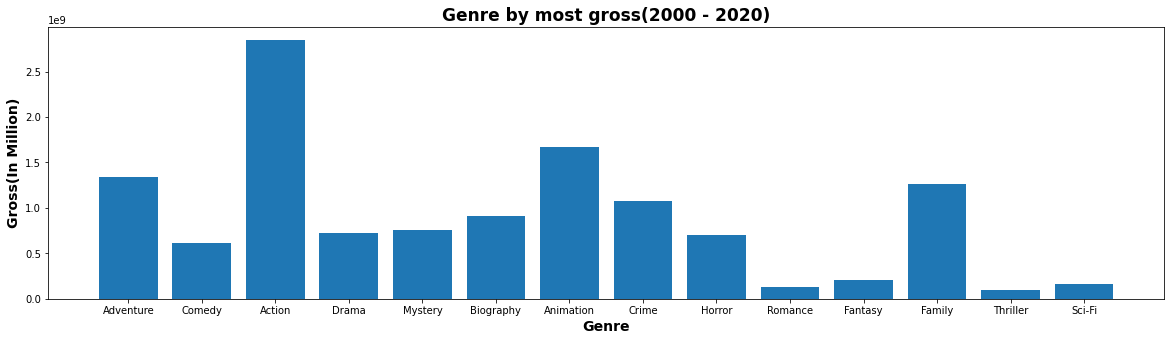

In [56]:
fig = plt.figure(figsize = (20, 5))
plt.xlabel('Genre',fontweight='bold',fontsize='14')
plt.ylabel('Gross(In Million)',fontweight='bold',fontsize='14')
plt.title('Genre by most gross(2000 - 2020)',fontweight= 'bold',fontsize='17')
plt.bar(df_new.genre,df_new.gross);

From above bar graph it is seen as that genre ( Action, advencture, Animation,Family) had most revenue


### Research Question 2: What kinds of properties are associated with movies that have high revenues? Does higher budget films receive higher revenue? Or does the higher voted score films have the higher revenue?

In [61]:
#I will like to know firstly what movies have the most budget.
df[df['budget'].notnull()][['name','budget','gross']].sort_values('budget',ascending=False).head(10)

,name,budget,gross
7445,Avengers: Endgame,356000000,2797501328
7244,Avengers: Infinity War,321000000,2048359754
7075,Star Wars: Episode VIII - The Last Jedi,317000000,1332698830
7066,Justice League,300000000,657926987
5060,Pirates of the Caribbean: at World's End,300000000,960996492
7463,Star Wars: Episode IX - The Rise of Skywalker,275000000,1078232589
7261,Solo: A Star Wars Story,275000000,392924807
4870,Superman Returns,270000000,391081192
7480,The Lion King,260000000,1670727580
5658,Tangled,260000000,592462816


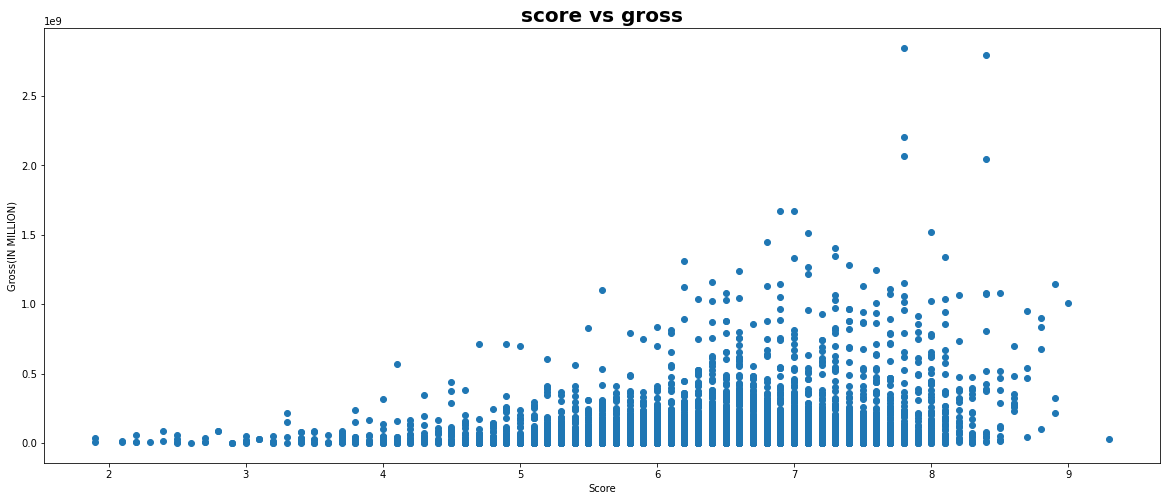

In [70]:
plt.figure(figsize=(20,8))
plt.title('score vs gross',fontweight='bold',fontsize= '20')
plt.xlabel('Score',fontsize='10')
plt.ylabel('Gross(IN MILLION)',fontsize='10')
plt.scatter(df.score,df.gross) ;


It seem that revenue is affected by the score on the flim